# Introduction to Linear Regression
In this notebook, you'll see how to create a linear regression model using the `scikit-learn` library.

You will be using a cleaned up version of the auto mpg dataset, with the goal being to predict a car's mpg based on the other attributes of that car.

In [1]:
import pandas as pd

In [2]:
cars = pd.read_csv('../data/auto_mpg_cleaned.csv')

In [3]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,American,ford torino


We are going to predict mpg based off of cylinders, displacement, horsepower, acceleration, and origin.

#### First, you can do some exploration to see how the variables are related to mpg.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
%matplotlib inline

First, take a look at the numeric predictors.

In [5]:
@interact(x = ['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders'])
def make_scatter(x):
    cars.plot(kind = 'scatter', x = x, y = 'mpg');

interactive(children=(Dropdown(description='x', options=('displacement', 'horsepower', 'weight', 'acceleration…

There are also some categorical predictors.

In [6]:
@interact(x = ['origin', 'model_year'])
def make_box(x):
   sns.boxplot(data = cars, x = x, y = 'mpg')

interactive(children=(Dropdown(description='x', options=('origin', 'model_year'), value='origin'), Output()), …

## Simple Linear Regression

Let's start with a simple linear regression. This means that we'll only use a single predictor variable. Let's use the `weight` feature to try and predict `mpg`.
This means that our regression equation will look like
$$ \text{mpg} = \beta_0 + \beta_1\cdot(\text{weight}) + \epsilon$$

Here, $\beta_0$ and $\beta_1$ are the coefficients which need to be solved for and $\epsilon$ represents the error term.

In [7]:
X = cars[['weight']]
y = cars['mpg']

When building models, you are often interested in the **predictive power** of the model. You are not interested in how well the model predicts on data that it has already seen, but instead on how well it generalizes to new, unseen data.

To evaluate this, you will set aside a portion of the full dataset as your _test set_. The remaining portion, called the _training set_ will be used to fit the model. 

Random state is an arbitrary value you assign so that you can reproduce your work or so that others running your code will get the same result as you. It is used when there is a random process, such as randomly splitting the data into a training and test set.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 321)

In [9]:
from sklearn.linear_model import LinearRegression

First, you need to create a LinearRegression instance.

In [10]:
lr = LinearRegression()

And then fit it on the training data. _Fitting a model_ means that you are showing your model labeled instances so that it can learn about the relationship between the predictor variables and the target variable. In the case of linear regression, the model needs to learn which coefficients best describe the relationship between predictors and target.

In [11]:
lr.fit(X_train, y_train)

LinearRegression()

We can access the coefficients $\beta_0$ and $\beta_1$ using the `intercept_` and `coef_` attributes.

In [12]:
lr.intercept_

46.16653987780032

In [13]:
lr.coef_

array([-0.00762584])

This shows that our regression equation is given by

$$ \text{mpg} = 46.1665399 - 0.00762584\cdot(\text{weight}) + \epsilon$$

This means that a one unit increase in weight is associated with a 0.00762584 drop in mpg. Put another way, adding 100 to weight is associated with a drop in mpg of 0.762584.

You can plot the regression line with the data to see how well it appears to do.

In [14]:
import numpy as np

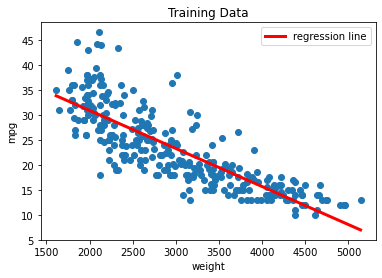

In [15]:
x = np.array([[np.min(X_train.weight)], [np.max(X_train.weight)]])
y = lr.predict(x)

plt.scatter(x = X_train.weight, y = y_train)
plt.plot(x, y, color = 'red', linewidth = 3, label = 'regression line')
plt.legend()
plt.title('Training Data')
plt.xlabel('weight')
plt.ylabel('mpg');

You can also calculate some metrics for the regression line.

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error

First, the $R^2$ score:

In [17]:
r2_score(y_train, lr.predict(X_train))

0.6826852119959008

And the mean absolute error:

In [18]:
mean_absolute_error(y_train, lr.predict(X_train))

3.3848949961280796

But if you're interested in predictions, you shouldn't care as much about how the model does on the training data. Instead, you should be interested in how it does on data it has not yet seen. 

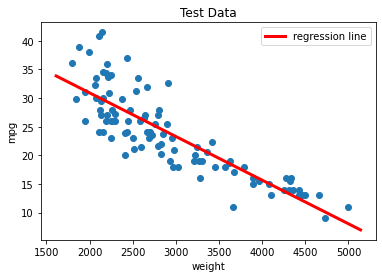

In [19]:
plt.scatter(x = X_test.weight, y = y_test)
plt.plot(x, y, color = 'red', linewidth = 3, label = 'regression line')
plt.legend()
plt.title('Test Data')
plt.xlabel('weight')
plt.ylabel('mpg');

**Question: Comment on what you see from this plot.**

In [20]:
r2_score(y_test, lr.predict(X_test))

0.7260432245624311

In [21]:
mean_absolute_error(y_test, lr.predict(X_test))

2.95710646000026

Based on the above plot, it appears that maybe a straight line is not the best model to use. Instead, you could try to fit a parabola, or a degree 2 polynomial based on weight. This will turn our regression equation into 
$$ \text{mpg} = \beta_0 + \beta_1\cdot(\text{weight}) + \beta_2\cdot(\text{weight})^2 + \epsilon$$

One way to do this is to use `PolynomialFeatures` from scikit-learn.

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
poly = PolynomialFeatures(degree = 2)

X_train_poly = poly.fit_transform(X_train)

X_test_poly = poly.transform(X_test)

PolynomialFeatures creates a column for the intercept, so we can specify `fit_intercept = False` when we create our new `LinearRegression` model.

In [24]:
poly_reg = LinearRegression(fit_intercept = False)
poly_reg.fit(X_train_poly, y_train)

LinearRegression(fit_intercept=False)

In [25]:
x = np.linspace(start = np.min(X_train.weight), stop = np.max(X_train.weight)).reshape(-1, 1)
x_poly = poly.transform(x)
y = poly_reg.predict(x_poly)

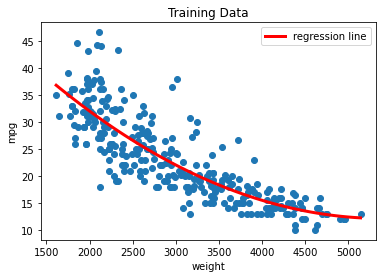

In [26]:
plt.scatter(x = X_train.weight, y = y_train)
plt.plot(x, y, color = 'red', linewidth = 3, label = 'regression line')
plt.legend()
plt.title('Training Data')
plt.xlabel('weight')
plt.ylabel('mpg');

And on the test data.

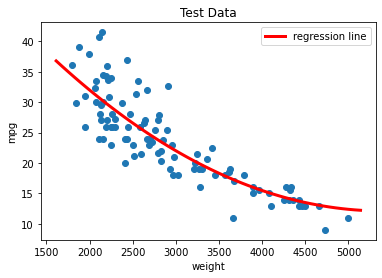

In [27]:
plt.scatter(x = X_test.weight, y = y_test)
plt.plot(x, y, color = 'red', linewidth = 3, label = 'regression line')
plt.legend()
plt.title('Test Data')
plt.xlabel('weight')
plt.ylabel('mpg');

**Comment on how the degree 2 curve compares to the original.**

In [28]:
r2_score(y_test, poly_reg.predict(X_test_poly))

0.743735724390844

In [29]:
mean_absolute_error(y_test, poly_reg.predict(X_test_poly))

2.781270134230916

## Multiple Linear Regression

There is no reason that you are restricted to using only weight to predict mpg. You can also include other features in you model.

In [30]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,American,ford torino


Let's see what happens if we want to incorporate some of the other features. We'll use `cylinders`, `displacement`, `horsepower`, `weight`, `acceleration`, and `origin`.

First, let's drop the features you won't be using.

In [31]:
cars = cars.drop(columns = ['car_name', 'model_year'])
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin
0,18.0,8,307.0,130,3504,12.0,American
1,15.0,8,350.0,165,3693,11.5,American
2,18.0,8,318.0,150,3436,11.0,American
3,16.0,8,304.0,150,3433,12.0,American
4,17.0,8,302.0,140,3449,10.5,American


Next, we need to deal with the `origin` column, which is a categorical variable. 

To use a categorical variable in your model, you'll need to transform it into a "dummy" numerical variable. You will do this by creating new indicator columns for all of the different possible levels of these variables. You can accomplish this by using the `get_dummies` function from `pandas`.

In [32]:
cars = pd.get_dummies(cars, drop_first=True)

In [33]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin_European,origin_Japanese
0,18.0,8,307.0,130,3504,12.0,0,0
1,15.0,8,350.0,165,3693,11.5,0,0
2,18.0,8,318.0,150,3436,11.0,0,0
3,16.0,8,304.0,150,3433,12.0,0,0
4,17.0,8,302.0,140,3449,10.5,0,0


The `get_dummies()` method created two columns out of the original origin column. In these columns, the corresponding value is marked with a 1, and all other values are maked with a 0.

**Question: Why do we not need a column `origin_American`?**

Now, we're going to build a linear model to predict `mpg` based on our predictors. This will look like

$$\text{mpg} = $$ $$\beta_0 + \beta_1\cdot(\text{cylinders}) + \beta_2\cdot(\text{horsepower}) + \beta_3\cdot(\text{weight}) + \beta_4\cdot(\text{acceleration}) + \beta_5\cdot(\text{origin_European}) + \beta_6\cdot(\text{origin_Japanese}) + \epsilon$$

In [34]:
# Predictors:
X = cars.drop(columns = 'mpg')

# Response:
y = cars['mpg']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 321)

In [36]:
lr_multiple = LinearRegression()
lr_multiple.fit(X_train, y_train)

LinearRegression()

Now, let's evaluate how well the model performs. You can no longer plot mpg vs. predictor with the regression line, since we now have 6 predictor variables. However, if you want a visual showing the performance of the model, you can plot the predicted value against the true value. 

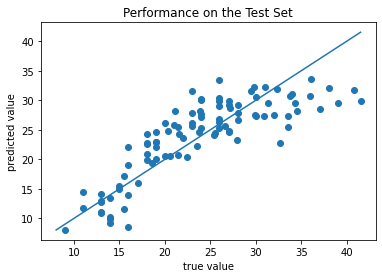

In [37]:
y_pred = lr_multiple.predict(X_test)

x_min = min(y_pred.min(), y_test.min())
x_max = max(y_pred.max(), y_test.max())

plt.scatter(y_test, y_pred)
plt.plot([x_min, x_max], [x_min, x_max])

plt.xlabel('true value')
plt.ylabel('predicted value')

plt.title('Performance on the Test Set');

**Question: What does this plot tell you?**

Now, let's calculate some metrics.

In [38]:
r2_score(y_test, y_pred)

0.6803692300948121

In [39]:
mean_absolute_error(y_test, y_pred)

3.321719248059414

**Question: How does the performance of this model compare to the models above? Do you have any ideas why this may be the case?**

What if you want to understand _how_ the model is making predictions? Since you are using a linear model, looking at coefficients can help you understand the model. The intercept and coefficients can be accessed from our trained model, `lr`.  

The code in the following cell extracts the coefficients and converts the result into a DataFrame.

In [40]:
coefficients = pd.DataFrame({'variable': ['intercept'] + list(X.columns),
                             'coefficient': [lr_multiple.intercept_] + list(lr_multiple.coef_)})

In [41]:
coefficients

,variable,coefficient
0,intercept,43.162105
1,cylinders,-0.537210
2,displacement,0.017592
3,horsepower,-0.079000
4,weight,-0.004579
5,acceleration,0.041484
6,origin_European,2.381881
7,origin_Japanese,3.205233


For the continuous variables, the coefficient represents the change in mpg that would occur for a one-unit change in the corresponding predictor, _if all other predictors are held constant_.

For example, our coefficients show that for every one unit increase in horsepower, all other variables held constant, there is a drop in mpg of 0.093286.

There is one strange value that stands out. It seems that according to the model, increasing displacement will increase mpg. However, if you look at the scatterplot earlier in this notebook, it seems that there is a negative association between the two variables. Cars with higher than average displacement (or engine size) tend to have lower than average mpg.

This can happen for a number of reasons, but the cause for an unexpected coefficient sign is due to correlations with other predictor variables.

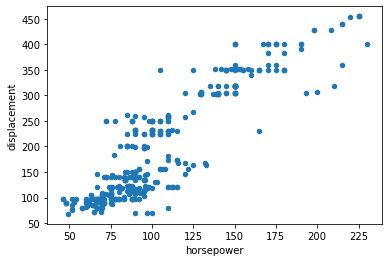

In [42]:
cars.plot(kind = 'scatter', x = 'horsepower', y = 'displacement');

You can see, for example, that displacement is strongly correlated with horsepower. One possible explanation for the positive coefficient on horsepower is that the effect of displacement has already been captured by the horsepower.

All of this to say that when you have correlated predictors, you need to exercise caution when interpreting them. It is always a good idea to do thorough exploratory analysis.

What about the categorical predictors? Look specifically at the origin variable. Since you dropped the origin_American variable when dummyizing, you can interpret the other two as the change in mpg from changing a car's origin to either European or Japanese, keeping all other variables fixed.

The model is telling you that, all other variables held fixed, a European car will tend to get about 2.38 mpg higher than an American car, and a Japanese car will tend to get about 3.21 mpg higher than an American car.